In [123]:
import numpy as np
import time

### Load Data

In [124]:
# Load 
x_train = np.load('HAR/x_train.npy')
y_train = np.load('HAR/y_train.npy')
x_test = np.load('HAR/x_test.npy')
y_test = np.load('HAR/y_test.npy')

# shape
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (8239, 6, 128)
y_train shape: (8239,)
x_test shape: (2060, 6, 128)
y_test shape: (2060,)


In [125]:
print(x_train)
print(y_train)

[[[-2.955706e-01 -2.973497e-01 -7.185090e-02 ...  4.694775e-01
    5.115014e-01  3.841527e-01]
  [ 4.133848e-02  1.966760e-01  3.118196e-01 ...  1.074501e-01
    1.813511e-01  1.813961e-01]
  [-2.175047e-01 -2.923019e-01 -3.364541e-01 ...  1.092480e-01
    1.480044e-02 -1.500882e-01]
  [ 7.814702e-02  2.045125e-01  1.349293e-01 ...  3.232122e-01
    1.046657e-01 -1.651919e-01]
  [-9.844646e-01 -6.932494e-01 -2.179860e-01 ... -4.846273e-01
   -2.734270e-01  6.718352e-01]
  [ 6.667712e-01  6.991225e-01  6.443475e-01 ... -7.751060e-01
   -9.245042e-01 -6.819656e-01]]

 [[-1.715811e-02 -3.178280e-02 -3.937447e-02 ...  9.891383e-02
    1.098336e-01  1.469693e-01]
  [ 4.283680e-03  9.682415e-02  1.554539e-01 ...  2.652732e-01
    1.381612e-01  2.044002e-02]
  [-1.127350e-01 -8.266044e-02 -3.003632e-02 ...  8.305199e-02
    1.056857e-01  6.428699e-02]
  [ 3.944168e-01  3.769730e-01  3.958352e-01 ... -1.663394e-01
    1.350868e-01  3.623121e-01]
  [ 2.362847e-01  4.174809e-01  4.147253e-01 ...

In [126]:
print(x_test)
print(y_test)

[[[ 3.431445e-01 -2.198824e-01 -3.635291e-01 ... -1.352959e-01
   -1.961829e-01 -2.246079e-01]
  [-1.758625e-01 -1.721152e-01 -2.935536e-01 ... -2.901333e-02
    4.940418e-02  1.508563e-01]
  [ 2.214099e-01  2.914912e-01  2.847791e-01 ...  4.354688e-02
   -3.111895e-02 -1.186902e-01]
  [ 1.705271e-01  2.656858e-01  3.631090e-01 ...  1.000009e+00
    8.364557e-01  7.397191e-01]
  [ 1.760619e-01 -4.977707e-01 -8.012118e-01 ... -1.279613e+00
   -1.151442e+00 -1.066346e+00]
  [ 2.594900e-01  2.007621e-01  2.046549e-02 ... -1.949560e-01
   -1.161068e-01 -4.993718e-02]]

 [[ 9.183939e-03  8.571481e-03  5.968489e-03 ...  3.258547e-02
    3.552567e-02  3.024754e-02]
  [ 1.309591e-03  4.265143e-03  6.054279e-03 ... -1.890899e-03
    1.837978e-02  1.401014e-02]
  [ 2.010833e-02  2.019429e-02  1.830404e-02 ... -1.075705e-02
    1.345826e-03 -2.675747e-03]
  [-1.627661e-02 -9.017916e-03 -9.390966e-03 ...  3.462532e-02
    2.540286e-02  1.292184e-02]
  [-3.889265e-02 -2.092474e-02 -8.113427e-03 ...

### Standardized

In [127]:
def one_hot_encode(y, num_classes):
    y = y.astype(int)
    if np.min(y) == 1:  # Kiểm tra xem nhãn có bắt đầu từ 1 không, nếu k thì -1
        y = y - 1
    return np.eye(num_classes)[y]

# Số lớp (class) 
num_classes = 6


print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

#one-hot encoding
y_train_one_hot = one_hot_encode(y_train, num_classes)
y_test_one_hot = one_hot_encode(y_test, num_classes)

print(f"y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"y_test_one_hot shape: {y_test_one_hot.shape}")


y_train shape: (8239,)
y_test shape: (2060,)
y_train_one_hot shape: (8239, 6)
y_test_one_hot shape: (2060, 6)


In [22]:
# def standardize_data(data):
#     # Tính trung bình và độ lệch chuẩn cho mỗi cột (mỗi cảm biến)
#     data_mean = np.mean(data, axis=0)
#     data_std = np.std(data, axis=0)
    
#     # Chuẩn hóa dữ liệu
#     standardized_data = (data - data_mean) / data_std
    
#     return standardized_data

In [27]:
# x_train_standardized = standardize_data(x_train)
# x_test_standardized = standardize_data(x_test)
# print(x_train_standardized,x_test_standardized)

[[[ 3.23767048e-01  3.05757459e-01  3.53062365e-01 ...  9.28824075e-01
    8.81571367e-01  8.33623900e-01]
  [-4.51956848e-01 -5.17635313e-01  2.20896411e-01 ... -5.56898195e-01
   -4.33916460e-01 -1.48883870e-01]
  [ 2.24343546e-02  8.71910047e-03 -2.70289177e-01 ... -2.22908028e-01
   -3.24536390e-01 -5.58998448e-01]
  [ 3.99521961e-01 -3.85548591e-01 -1.14659317e+00 ...  4.97774619e-01
    4.76172288e-01  6.21466947e-01]
  [-6.17985914e-02 -4.38970500e-01 -6.52268247e-01 ...  1.20454883e-01
    4.63490677e-02  2.07830241e-01]
  [-4.25826226e-01 -8.64126563e-01 -9.20381001e-01 ...  2.09169688e-01
    2.20948506e-01  4.67704076e-01]]

 [[-1.69491082e-01 -1.90106683e-01 -1.59903427e-01 ... -3.11685931e-03
   -6.79645954e-03  1.33544738e-02]
  [-4.91942822e-01 -4.97007651e-01 -5.20042635e-01 ... -6.78335318e-01
   -6.27148077e-01 -5.44747484e-01]
  [-4.02045027e-01 -4.02122656e-01 -2.85198519e-01 ... -3.27266257e-01
   -4.00070775e-01 -3.68076154e-01]
  [ 7.06016992e-02  1.48772049e-01 

### Building Neural Network

In [128]:
class NeuralNetwork:
    def __init__(self, sizes, epochs, lr):
        self.sizes = sizes
        self.epochs = epochs
        self.lr = lr

        # Initialize weights with Xavier initialization
        self.params = {
            'W1': np.random.randn(sizes[1], sizes[0]) * np.sqrt(1. / sizes[0]),
            'b1': np.zeros((sizes[1], 1)),
            'W2': np.random.randn(sizes[2], sizes[1]) * np.sqrt(1. / sizes[1]),
            'b2': np.zeros((sizes[2], 1)),
            'W3': np.random.randn(sizes[3], sizes[2]) * np.sqrt(1. / sizes[2]),
            'b3': np.zeros((sizes[3], 1))
        }
        self.loss_history = []
        self.acc_history = []

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)  # Efficient derivative
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=0, keepdims=True))  # Stability trick
        return exps / np.sum(exps, axis=0, keepdims=True)

    def forward_pass(self, x):
        self.params['A0'] = x
        self.params['Z1'] = np.dot(self.params['W1'], x) + self.params['b1']
        self.params['A1'] = self.sigmoid(self.params['Z1'])
        self.params['Z2'] = np.dot(self.params['W2'], self.params['A1']) + self.params['b2']
        self.params['A2'] = self.sigmoid(self.params['Z2'])
        self.params['Z3'] = np.dot(self.params['W3'], self.params['A2']) + self.params['b3']
        self.params['A3'] = self.softmax(self.params['Z3'])
        return self.params['A3']

    def backward_pass(self, y, output):
        grads = {}
        error = output - y

        grads['W3'] = np.dot(error, self.params['A2'].T)
        grads['b3'] = np.sum(error, axis=1, keepdims=True)
        error = np.dot(self.params['W3'].T, error) * self.sigmoid(self.params['A2'], derivative=True)

        grads['W2'] = np.dot(error, self.params['A1'].T)
        grads['b2'] = np.sum(error, axis=1, keepdims=True)
        error = np.dot(self.params['W2'].T, error) * self.sigmoid(self.params['A1'], derivative=True)

        grads['W1'] = np.dot(error, self.params['A0'].T)
        grads['b1'] = np.sum(error, axis=1, keepdims=True)
        return grads

    def update_parameters(self, grads):
        for key in self.params.keys():
            if key in grads:
                self.params[key] -= self.lr * grads[key]

    def compute_loss(self, y, output):
        loss = -np.mean(np.sum(y * np.log(output + 1e-9), axis=1))  # Cross-entropy
        return loss

    def train(self, x_train, y_train, x_test, y_test):
        for epoch in range(self.epochs):
            start_time = time.time()
            loss = 0
            for i in range(x_train.shape[0]):
                x = x_train[i].reshape(-1, 1)
                y = y_train[i].reshape(-1, 1)
                output = self.forward_pass(x)
                loss += self.compute_loss(y, output)
                grads = self.backward_pass(y, output)
                self.update_parameters(grads)

            loss /= x_train.shape[0]
            self.loss_history.append(loss)  # Append loss history
            accuracy = self.compute_accuracy(x_test, y_test)
            self.acc_history.append(accuracy)  # Append accuracy history

            print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.2f}%, Time: {time.time() - start_time:.2f}s")

    def compute_accuracy(self, x_test, y_test):
        correct_predictions = 0
        for i in range(x_test.shape[0]):
            x = x_test[i].reshape(-1, 1)
            y = np.argmax(y_test[i])
            output = self.forward_pass(x)
            if np.argmax(output) == y:
                correct_predictions += 1
        return correct_predictions / x_test.shape[0] * 100
    
    def save_weights_and_bias_bin(self):
        # Lấy trọng số và bias
        weights_layer1 = self.params['W1']
        bias_layer1 = self.params['b1']
        weights_layer2 = self.params['W2']
        bias_layer2 = self.params['b2']
        weights_layer3 = self.params['W3']
        bias_layer3 = self.params['b3']
        
        # Gộp tất cả trọng số và bias vào một mảng numpy
        weights_and_bias = np.concatenate([weights_layer1.flatten(), bias_layer1.flatten(),
                                          weights_layer2.flatten(), bias_layer2.flatten(),
                                          weights_layer3.flatten(), bias_layer3.flatten()])
        
        # Lưu vào tệp nhị phân
        weights_and_bias.tofile('weights_and_bias.bin')
    
    def predict(self, x):
        x = x.reshape(-1, 1)
        output = self.forward_pass(x)
        return np.argmax(output)

### Training the model

In [129]:
model = NeuralNetwork(sizes=[768, 128, 64, 6], epochs=500, lr=0.01)
model.train(x_train, y_train_one_hot, x_test, y_test_one_hot)
model.save_weights_and_bias_bin()

Epoch 1/500, Loss: 0.3018, Accuracy: 19.17%, Time: 4.35s
Epoch 2/500, Loss: 0.2977, Accuracy: 22.96%, Time: 4.36s
Epoch 3/500, Loss: 0.2935, Accuracy: 28.20%, Time: 4.50s
Epoch 4/500, Loss: 0.2681, Accuracy: 29.08%, Time: 4.28s
Epoch 5/500, Loss: 0.2412, Accuracy: 30.24%, Time: 4.52s
Epoch 6/500, Loss: 0.2282, Accuracy: 34.13%, Time: 4.24s
Epoch 7/500, Loss: 0.2166, Accuracy: 39.56%, Time: 4.34s
Epoch 8/500, Loss: 0.2057, Accuracy: 42.96%, Time: 4.23s
Epoch 9/500, Loss: 0.1949, Accuracy: 43.88%, Time: 4.26s
Epoch 10/500, Loss: 0.1858, Accuracy: 44.76%, Time: 4.25s
Epoch 11/500, Loss: 0.1771, Accuracy: 45.78%, Time: 4.34s
Epoch 12/500, Loss: 0.1688, Accuracy: 47.14%, Time: 4.19s
Epoch 13/500, Loss: 0.1606, Accuracy: 48.54%, Time: 4.24s
Epoch 14/500, Loss: 0.1527, Accuracy: 51.07%, Time: 4.45s
Epoch 15/500, Loss: 0.1449, Accuracy: 52.86%, Time: 4.68s
Epoch 16/500, Loss: 0.1377, Accuracy: 54.27%, Time: 4.70s
Epoch 17/500, Loss: 0.1314, Accuracy: 55.24%, Time: 4.42s
Epoch 18/500, Loss: 0.1

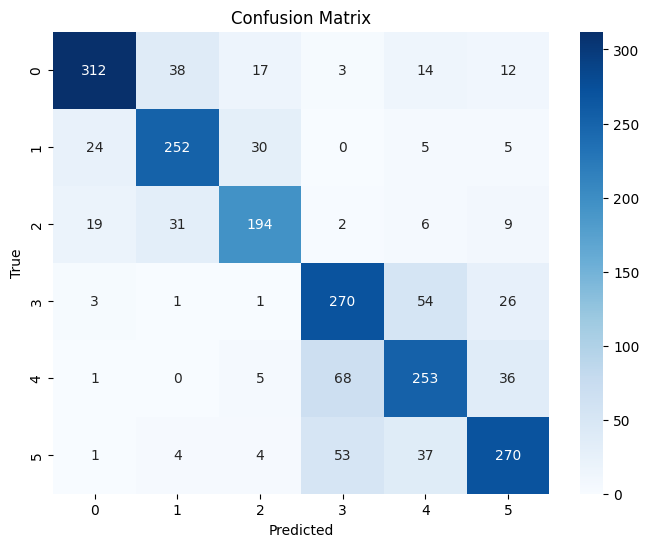

In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(6), yticklabels=np.arange(6))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Dự đoán trên x_test
y_pred = []
for i in range(x_test.shape[0]):
    y_pred.append(model.predict(x_test[i]))

# Vẽ confusion matrix
plot_confusion_matrix(np.argmax(y_test_one_hot, axis=1), y_pred)


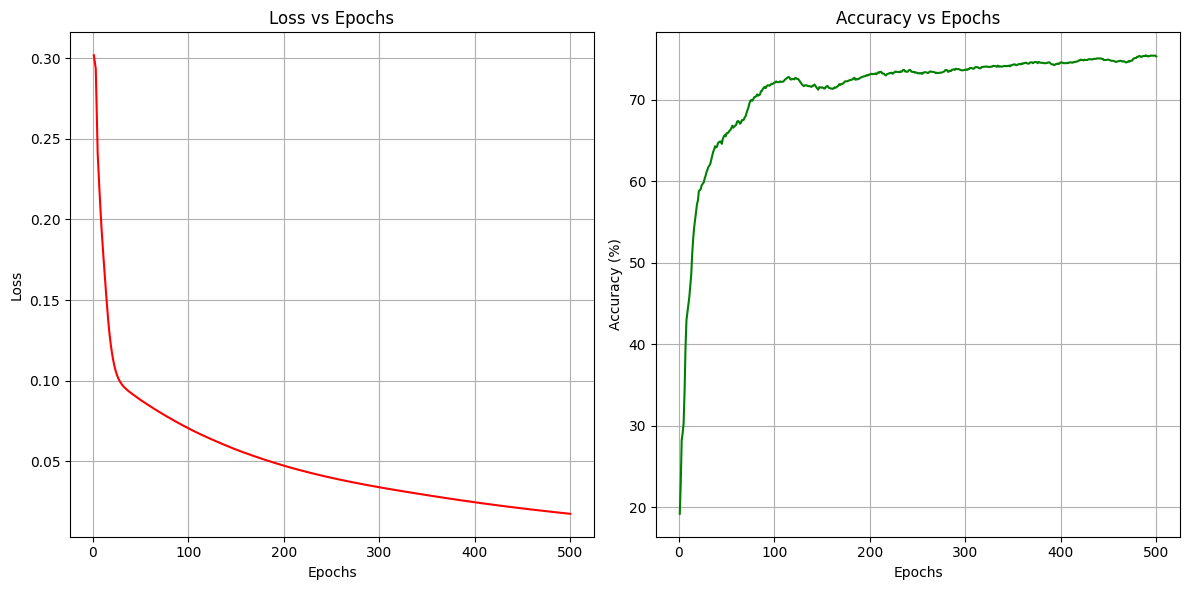

In [131]:
# Vẽ đồ thị loss và accuracy
def plot_loss_accuracy(loss_history, acc_history):
    epochs = np.arange(1, len(loss_history) + 1)
    
    # Loss plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_history, label='Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epochs')
    plt.grid(True)

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc_history, label='Accuracy', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy vs Epochs')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


plot_loss_accuracy(model.loss_history, model.acc_history)

In [132]:
# weight and bias
weights_layer1 = model.params['W1']
bias_layer1 = model.params['b1']

weights_layer2 = model.params['W2']
bias_layer2 = model.params['b2']

weights_layer3 = model.params['W3']
bias_layer3 = model.params['b3']

# shape
print("Shape of W1:", weights_layer1.shape)
print("Shape of b1:", bias_layer1.shape)

print("Shape of W2:", weights_layer2.shape)
print("Shape of b2:", bias_layer2.shape)

print("Shape of W3:", weights_layer3.shape)
print("Shape of b3:", bias_layer3.shape)


Shape of W1: (128, 768)
Shape of b1: (128, 1)
Shape of W2: (64, 128)
Shape of b2: (64, 1)
Shape of W3: (6, 64)
Shape of b3: (6, 1)
